<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

## GRAPE from GitHub Repository


<div>
<img src="https://drive.google.com//uc?export=view&id=1hw43Oi3lGTCkspQ0ged2bZB8q2EpcPhz" width="150"/>
</div> 

GRammatical Algorithms in Python for Evolution (GRAPE)


In [ ]:
## mount your Google drive
# 1) click on the link
# 2) sign in
# 3) copy the provided code
# 4) paste it in the text box bellow
# 5) click the folder icon at the right
# 6) verify your drive is mounted

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone this repository in which we have all functions and classes created or adapted to this work.

In [ ]:
import os.path
# Get the library from our BDS research Group
# copy the path from your drive
PATH = '/content/drive/MyDrive/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git  
    print('Cloning grape in your Drive')

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

/content/drive/MyDrive
Cloning into 'grape'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 95 (delta 49), reused 70 (delta 27), pack-reused 0
Unpacking objects: 100% (95/95), done.
Cloning grape in your Drive
/content/drive/MyDrive/grape


Import adapted functions and classes from PonyGE2.

Import our algorithms, adapted from deap.algorithms.

Import DEAP (maybe it can be necessary to run the installation before that).

Import functions used by our grammars.



In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install deap==1.3 

from ponyge2_adapted_files import Grammar, ge
import algorithms
from functions import add, sub, mul, pdiv, neg, and_, or_, not_, less_than_or_equal, greater_than_or_equal

from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap #to print the best individual as an expression
from deap import creator, base, tools

from sklearn.model_selection import train_test_split

     |████████████████████████████████| 152 kB 5.3 MB/s 


## Choose a Problem

Set a problem to solve, you can choose:
* 'spambase' 
* 'heartDisease'.

In [ ]:
# choose a problem to solve
# 'spambase' or 'heartDisease'
problem = 'spambase'

Read datasets and grammars according to the problem picked in the previous cell.

In [ ]:
# -------------- SPAMBASE ------------------
if problem == 'spambase':

    data = pd.read_table(r"datasets/spambase.csv")

    # class labels
    Y = data['class'].to_numpy()

    # drop the column 'class'
    data = data.drop(['class'], axis=1)        

    features = list(data.columns.values)
    data.loc[:, features] = (data.loc[:, features] - data.loc[:, features].mean())/data.loc[:, features].std()

    # data features
    X = data.to_numpy()
#    l, c = data.shape
#    X = np.zeros([l, c], dtype=float)
    
#    for i in range(l):
#        for j in range(c):
#            X[i,j] = data['d'+ str(j)].iloc[i]

 #   for i in range(c):
  #    X[:,i] = (X[:,i] - X[:,i].mean)/X[:,i].std)

    # split data into train-test, test_size=0.3-> 30% test, 70% training
    X_part, X_test, Y_part, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_part, Y_part, test_size=0.33, random_state=42)
    
    X_train = np.transpose(X_train)
    X_val = np.transpose(X_val)
    X_test = np.transpose(X_test)

    # grammar       
    GRAMMAR_FILE = 'spambase.bnf'

# ---------------- HEARTDISEASE ------------------
elif problem == 'heartDisease':
    data =  pd.read_csv(r"datasets/processed.cleveland.data", sep=",")

    # preprocessing
    # remove registers (rows) with missing information
    # happens in columns d11 and d12
    data = data[data.ca != '?']
    data = data[data.thal != '?']

    # class labels
    Y = data['class'].to_numpy()

    # drop the column 'class'
    data = data.drop(['class'], axis=1)        
        
    # normalising numeric data    
    features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

    data.loc[:, features] = (data.loc[:, features] - data.loc[:, features].mean())/data.loc[:, features].std()
    
    # Using oneHot enconding (pandas) on categorical (non binary) features
    # https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html
    data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])
    
    # data features
    X = data.to_numpy()

    # this is a multiclass problem: 5 classes with 297 samples in total
    # class0=160, class1=54, class2=35, class3=35, class4=13
    # we convert it into a binary classification problem: classA, classB
    # consider each class at the time using one-vs-all
    # classA using label 0 and the remaining classB using 1
    for i in range(len(Y)):
        #Y[i] = 1 if Y[i] > 0 else 0
        Y[i] = 0 if Y[i] <= 0 else 1

    # split data into train-test, test_size=0.3-> 30% test, 70% training
    X_part, X_test, Y_part, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    X_train, X_val, Y_train, Y_val = train_test_split(X_part, Y_part, test_size=0.33, random_state=42)
    
    X_train = np.transpose(X_train)
    X_val = np.transpose(X_val)
    X_test = np.transpose(X_test)

    # grammar      
    GRAMMAR_FILE = 'heartDisease.bnf'

In [ ]:
 print('Training (X,Y):\t', X_train.shape, Y_train.shape)
 print('Validation (X,Y):\t', X_val.shape, Y_val.shape)
 print('Test (X,Y):\t', X_test.shape, Y_test.shape)

Training (X,Y):	 (57, 2311) (2311,)
Validation (X,Y):	 (57, 1139) (1139,)
Test (X,Y):	 (57, 1151) (1151,)


## Heart Disease Dataset

###Preprocessing the heart disease dataset

- Remove rows with missing data
- Consider all unhealthy classes as '1'
- Normalise numeric data
- Use One-Hot encoding in non-binary categorical data




###Attribute information about the heart disease dataset

Numeric attributes:
- age: age in years
- trestbps: esting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- thalach: maximum heart rate achieved 
- oldpeak: ST depression induced by exercise relative to rest

Boolean attributes:
- sex: (1 = male; 0 = female)
- fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
- exang: exercise induced angina (1 = yes; 0 = no)    

Categorical (non binary) attributes:
- cp: chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic        
- restecg: resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria   
- slope: the slope of the peak exercise ST segment
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping     
 
- ca: number of major vessels (0-3) colored by flourosopy        
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect      


The predicted attribute: diagnosis of heart disease (angiographic disease tatus)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing

Print data.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

data.head()

,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d55,d56
0,-0.342396,0.330849,0.712781,-0.046894,0.011563,-0.350228,-0.291762,-0.262533,-0.323267,-0.371324,-0.296827,0.114075,-0.312021,-0.174908,-0.190094,0.086162,-0.321101,2.080980,0.150889,-0.167875,0.125115,-0.118159,-0.290178,-0.212971,-0.328779,-0.299207,-0.22787,-0.231805,-0.166713,-0.225215,-0.160522,-0.143196,-0.174901,-0.145199,-0.198046,-0.242104,-0.323420,-0.05983,-0.180892,-0.185284,-0.120892,-0.172581,-0.205971,-0.127329,-0.297744,-0.197366,-0.07138,-0.111534,-0.158436,-0.514251,-0.155181,0.623939,-0.308321,-0.103037,-0.045242,0.045293,-0.008723
1,0.345322,0.051904,0.435082,-0.046894,-0.256089,0.672326,0.244717,-0.088001,-0.323267,1.086593,0.745125,0.288150,1.847190,0.451614,0.350774,-0.131811,-0.163463,0.179347,1.018260,-0.167875,0.649761,-0.118159,0.937389,0.758483,-0.328779,-0.299207,-0.22787,-0.231805,-0.166713,-0.225215,-0.160522,-0.143196,-0.174901,-0.145199,-0.198046,-0.242104,-0.158112,-0.05983,-0.180892,-0.185284,-0.120892,-0.172581,-0.205971,-0.127329,-0.297744,-0.197366,-0.07138,-0.111534,-0.158436,-0.026004,-0.155181,0.126189,0.423737,0.008762,-0.002443,0.250536,1.228191
2,-0.145906,-0.165054,0.851631,-0.046894,1.364698,0.343648,0.193623,0.036666,1.973802,0.016420,1.588611,-0.106420,0.086602,-0.174908,6.570750,-0.228687,-0.185982,1.591451,-0.170151,0.459863,-0.249632,-0.118159,3.021398,-0.077420,-0.328779,-0.299207,-0.22787,-0.231805,-0.166713,-0.225215,-0.160522,-0.143196,-0.174901,-0.145199,-0.198046,-0.242104,-0.323420,-0.05983,-0.180892,-0.013814,-0.120892,-0.172581,0.330194,-0.127329,-0.238437,-0.131513,-0.07138,-0.111534,-0.117364,0.014683,-0.155181,0.008495,0.440005,-0.079746,0.145905,2.220865,3.258378
3,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,1.241293,-0.268890,0.717757,-0.174908,-0.190094,0.074052,-0.321101,-0.347838,0.854924,-0.167875,-0.416187,-0.118159,-0.290178,-0.212971,-0.328779,-0.299207,-0.22787,-0.231805,-0.166713,-0.225215,-0.160522,-0.143196,-0.174901,-0.145199,-0.198046,-0.242104,-0.323420,-0.05983,-0.180892,-0.185284,-0.120892,-0.172581,-0.205971,-0.127329,-0.297744,-0.197366,-0.07138,-0.111534,-0.158436,-0.007510,-0.155181,-0.161917,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205
4,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,0.605791,1.241293,-0.268890,0.717757,-0.174908,-0.190094,0.074052,-0.321101,-0.347838,0.854924,-0.167875,-0.416187,-0.118159,-0.290178,-0.212971,-0.328779,-0.299207,-0.22787,-0.231805,-0.166713,-0.225215,-0.160522,-0.143196,-0.174901,-0.145199,-0.198046,-0.242104,-0.323420,-0.05983,-0.180892,-0.185284,-0.120892,-0.172581,-0.205971,-0.127329,-0.297744,-0.197366,-0.07138,-0.111534,-0.158436,-0.014908,-0.155181,-0.164369,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205


## GE Parameters

**Print grammar**

In [ ]:
f = open("grammars/" + GRAMMAR_FILE, "r")
print(f.read())
f.close() 

<e>   ::= <e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|<e>+<e>|<e>-<e>|<e>*<e>|pdiv(<e>,<e>)|neg(<e>)|x[0]|x[1]|x[2]|x[3]|x[4]|x[5]|x[6]|x[7]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]|x[14]|x[15]|x[16]|x[17]|x[18]|x[19]|x[20]|x[21]|x[22]|x[23]|x[24]|x[25]|x[26]|x[27]|x[28]|x[29]|x[30]|x[31]|x[32]|x[33]|x[34]|x[35]|x[36]|x[37]|x[38]|x[39]|x[40]|x[41]|x[42]|x[43]|x[44]|x[45]|x[46]|x[47]|x[48]|x[49]|x[50]|x[51]|x[52]|x[53]|x[54]|x[55]|x[56]|<c><c>.<c><c>|<c><c>.<c><c>|<c><c>.<c><c>|<c><c

Set up the grammar addressed by GRAMMAR_FILE in the class Grammar.

In [ ]:
BNF_GRAMMAR = Grammar(path.join("grammars", GRAMMAR_FILE))

Define as fitness function the number of outputs wrongly predicted.

In [ ]:
def fitness_eval(individual, points):
    """
    Fitness Fucntion
    """

    x = points[0]
    Y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        # FP err can happen through eg overflow (lots of pow/exp calls)
        # ZeroDiv can happen when using unprotected operators
        return np.NaN,
    assert np.isrealobj(pred)
    
    try:
        Y_class = [1 if pred[i] > 0 else 0 for i in range(len(Y))]
    except (IndexError, TypeError):
        return np.NaN,

    compare = np.equal(Y,Y_class)
    fitness = 1 - np.mean(compare)
   
    return fitness,

Create a deap toolbox.

Use negative weights in the `base.Fitness` since we are trying to minimise the fitness.

`ge.Individual` is a class with the following attributes: `phenotype`, `genome`, `tree`, `nodes`, `invalid` (True or False), `depth` and `used_codons`.

Usually, when using deap, we initialise each individual independently, and then we repeat that until we fill out the whole population. However, since we are using Position Independent Grow Initialisation, we need to initialise all individuals simultaneously.

`ge.selTournament` prevents selecting invalid individuals.

`ge.crossover_onepoint` selects crossover points within the used portion of the genome. 

Similarly, `ge.mutation_int_flip_per_codon` performs only over the effective length.



In [ ]:
# create a toolbox for DEAP
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', ge.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", ge.selTournament, tournsize=7)

# Single-point crossover:
toolbox.register("mate", ge.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", ge.mutation_int_flip_per_codon)


Set the main function and run it.

Set the statistics object regarding the fitness score, but there are other statistics defined internally.

Perform Grammatical Evolution using `algorithms.ge_eaSimple`, a simple evolutionary algorithm. The differences to the `algorithms.eaSimple` used by deap are:

*   We use elitism;
*   After crossover and mutation, we check the offspring to assure that the max tree depth is not achieved;
*   We measure the generation and the selection times;
*   We count the number of invalid individuals.

## Run GE

Set our Grammatical Evolution parameters.

In [ ]:
## GE parameters
N_RUNS = 30
# start with 100 just to test annd increase later say to 1000
POPULATION_SIZE = 1000
# start with 20 just to test annd increase later say to 200
MAX_GENERATIONS = 50
P_CROSSOVER = 0.8
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)
HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 10
MIN_INIT_TREE_DEPTH = 2
MAX_TREE_DEPTH = 17
MAX_WRAPS = 0
CODON_SIZE = 255

Create our statistics.

In [ ]:
minListFitness = np.zeros([N_RUNS,MAX_GENERATIONS], dtype=float) #best training fitness
trainingFitness = np.zeros([N_RUNS,MAX_GENERATIONS], dtype=float) #training fitness of the best individual
valFitness = np.zeros([N_RUNS,MAX_GENERATIONS], dtype=float) #validation fitness of the best individual
testFitness = np.zeros([N_RUNS], dtype=float) #test fitness of the best individual
testFitness_min = np.zeros([N_RUNS], dtype=float) #training fitness of the individual with the best training fitness (last gen)

Run **N_RUNS** times.

In [ ]:
for r in range(0, N_RUNS):
  # create initial population (generation 0):
  population = toolbox.populationCreator(size=POPULATION_SIZE, 
                bnf_grammar=BNF_GRAMMAR, 
                min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                max_tree_depth=MAX_TREE_DEPTH, 
                max_wraps=MAX_WRAPS,
                codon_size=CODON_SIZE
                )

  # define the hall-of-fame objects:
  hof = []
  halloffame_train = tools.HallOfFame(HALL_OF_FAME_SIZE) #best individual considering only the training set


  # prepare the statistics object:
  stats = tools.Statistics(key=lambda ind: ind.fitness.values)
  stats.register("avg", np.nanmean)
  stats.register("std", np.nanstd)
  stats.register("min", np.nanmin)
  stats.register("max", np.nanmax)

  print("\n\nCurrently on run", r+1, "of",N_RUNS)

  # run Grammatical Evolution our parameters
  population, logbook = algorithms.ge_eaSimpleWithElitism_evolveWithVal(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                            bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                            max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                            points_train=[X_train, Y_train], 
                                            points_val=[X_val, Y_val], 
                                            halloffame=hof, halloffame_train=halloffame_train, 
                                            stats=stats, 
                                            verbose=False)
  
  # create statistics
  max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
  min_fitness_values, std_fitness_values = logbook.select("min", "std")
  best_ind_train = logbook.select("best_ind_train")
  best_ind_val = logbook.select("best_ind_val")
  best_ind_length = logbook.select("best_ind_length")
  avg_length = logbook.select("avg_length")
  max_length = logbook.select("max_length")
  selection_time = logbook.select("selection_time")
  generation_time = logbook.select("generation_time")
  gen, invalid = logbook.select("gen", "invalid")

  # print info for best solution found:
  best = hof[0]
  best_considering_only_train = halloffame_train.items[0]
  test_fitness = fitness_eval(best, [X_test,Y_test])[0]
  test_fitness_only_train = fitness_eval(best_considering_only_train, [X_test,Y_test])[0]
  print("Best individual: \n","\n".join(textwrap.wrap(best.phenotype,80)))
  print("Depth: ", best.depth)
  print("Length of the genome: ", len(best.genome))
  print(f'Used portion of the genome: {best.used_codons/len(best.genome):.2f}')
  print("\nTraining Fitness: ", best.fitness.values[0])
  print("Validation Fitness: ", best.fitness_val)
  print("Test Fitness: ", test_fitness)
  print("Test Fitness using the individual with the best training fitness (last generation): ", test_fitness_only_train)
  
  # Save statistics for this run:
  for i in range(MAX_GENERATIONS):
    minListFitness[r,i] = min_fitness_values[i]
    trainingFitness[r,i] = best_ind_train[i]
    valFitness[r,i] = best_ind_val[i]
  testFitness[r] = test_fitness
  testFitness_min[r] = test_fitness_only_train
  
  #minListFitness.append(min_fitness_values) #best training fitness
  #trainingFitness.append(best_ind_train) #training fitness of the best individual
  #valFitness.append(best_ind_val) #validation fitness of the best individual
  #testFitness.append(test_fitness) #test fitness of the best individual
  #testFitness_min.append(test_fitness_only_train) #training fitness of the individual with the best training fitness (last gen)



Currently on run 1 of 30
Best individual: 
 x[52]+x[6]+x[6]+x[52]+x[52]-x[52]+x[52]+x[55]-x[52]+x[3]-x[24]-x[52]+x[6]-x[25]-
x[45]-x[30]-x[52]+x[6]-x[25]+x[15]+x[6]*x[47]-x[24]-x[55]+x[55]+x[52]+x[51]-x[52
]+x[6]-x[30]-x[6]+x[52]+x[55]+x[52]+x[55]+x[52]+x[3]-x[24]-x[52]+x[6]-x[25]-x[45
]-x[30]-x[41]-neg(neg(neg(x[15])))+x[54]
Depth:  16
Length of the genome:  100
Used portion of the genome: 0.94

Training Fitness:  0.08308091735179579
Validation Fitness:  0.08691834942932397
Test Fitness:  0.07471763683753263
Test Fitness using the individual with the best training fitness (last generation):  0.08340573414422237


Currently on run 2 of 30
Best individual: 
 x[55]+x[51]*x[6]*x[51]+x[52]+x[6]+x[23]+x[52]+x[51]+00.87+x[51]+x[23]+x[6]+x[54]
+x[52]+x[22]+x[6]+x[15]+99.67+x[52]-98.33
Depth:  12
Length of the genome:  173
Used portion of the genome: 0.31

Training Fitness:  0.09995672868887928
Validation Fitness:  0.11325724319578578
Test Fitness:  0.0938314509122502
Test Fitness using the 

## Plots

Plot graph regarding the best individual in each generations considering the training set and the test set.

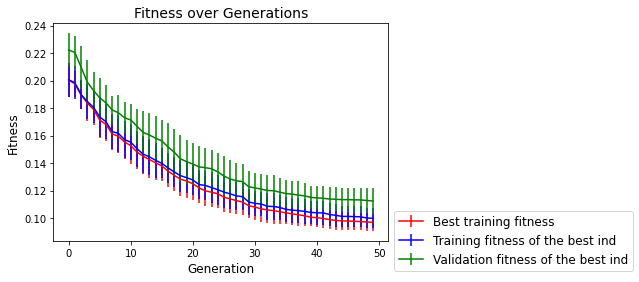

In [ ]:
# Plot statistics:
x = np.arange(0, MAX_GENERATIONS)

plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness', fontsize=12)
plt.title('Fitness over Generations', fontsize=14)
plt.errorbar(x, np.mean(minListFitness, axis=0), yerr=np.std(minListFitness, axis=0),label="Best training fitness",color="Red")
plt.errorbar(x, np.mean(trainingFitness, axis=0), yerr=np.std(trainingFitness, axis=0),label="Training fitness of the best ind",color="Blue")
plt.errorbar(x, np.mean(valFitness, axis=0), yerr=np.std(valFitness, axis=0),label="Validation fitness of the best ind", color="Green")
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0))
plt.show()

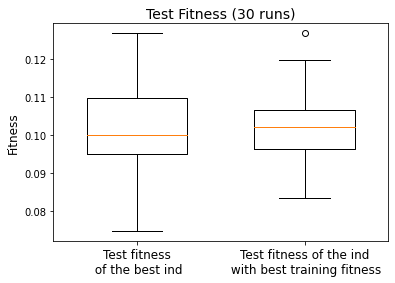

In [ ]:
data = [testFitness, testFitness_min]
plt.ylabel('Fitness', fontsize=12)
plt.title('Test Fitness (30 runs)', fontsize=14)
plt.boxplot(data, widths = 0.6)
plt.axes().set_xticklabels(['Test fitness\n of the best ind', 'Test fitness of the ind\n with best training fitness'], fontsize=12)

plt.show()

In [ ]:
a = 0
for i in range(N_RUNS):
  if testFitness[i] <= testFitness_min[i]:
    a += 1
print("Number of times in which using the approach with validation set is better or equal: ", a, " of ", N_RUNS)

Number of times in which using the approach with validation set is better or equal:  19  of  30


Run again for a bigger number of generations.

In [ ]:
MAX_GENERATIONS = 200

minListFitness2 = np.zeros([N_RUNS,MAX_GENERATIONS], dtype=float) #best training fitness
trainingFitness2 = np.zeros([N_RUNS,MAX_GENERATIONS], dtype=float) #training fitness of the best individual
valFitness2 = np.zeros([N_RUNS,MAX_GENERATIONS], dtype=float) #validation fitness of the best individual
testFitness2 = np.zeros([N_RUNS], dtype=float) #test fitness of the best individual
testFitness_min2 = np.zeros([N_RUNS], dtype=float) #training fitness of the individual with the best training fitness (last gen)

for r in range(0, N_RUNS):
  # create initial population (generation 0):
  population = toolbox.populationCreator(size=POPULATION_SIZE, 
                bnf_grammar=BNF_GRAMMAR, 
                min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                max_tree_depth=MAX_TREE_DEPTH, 
                max_wraps=MAX_WRAPS,
                codon_size=CODON_SIZE
                )

  # define the hall-of-fame objects:
  hof = []
  halloffame_train = tools.HallOfFame(HALL_OF_FAME_SIZE) #best individual considering only the training set


  # prepare the statistics object:
  stats = tools.Statistics(key=lambda ind: ind.fitness.values)
  stats.register("avg", np.nanmean)
  stats.register("std", np.nanstd)
  stats.register("min", np.nanmin)
  stats.register("max", np.nanmax)

  print("\n\nCurrently on run", r+1, "of",N_RUNS)

  # run Grammatical Evolution our parameters
  population, logbook = algorithms.ge_eaSimpleWithElitism_evolveWithVal(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                            bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                            max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                            points_train=[X_train, Y_train], 
                                            points_val=[X_val, Y_val], 
                                            halloffame=hof, halloffame_train=halloffame_train, 
                                            stats=stats, 
                                            verbose=False)
  
  # create statistics
  max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
  min_fitness_values, std_fitness_values = logbook.select("min", "std")
  best_ind_train = logbook.select("best_ind_train")
  best_ind_val = logbook.select("best_ind_val")
  best_ind_length = logbook.select("best_ind_length")
  avg_length = logbook.select("avg_length")
  max_length = logbook.select("max_length")
  selection_time = logbook.select("selection_time")
  generation_time = logbook.select("generation_time")
  gen, invalid = logbook.select("gen", "invalid")

  # print info for best solution found:
  best = hof[0]
  best_considering_only_train = halloffame_train.items[0]
  test_fitness = fitness_eval(best, [X_test,Y_test])[0]
  test_fitness_only_train = fitness_eval(best_considering_only_train, [X_test,Y_test])[0]
  print("Best individual: \n","\n".join(textwrap.wrap(best.phenotype,80)))
  print("Depth: ", best.depth)
  print("Length of the genome: ", len(best.genome))
  print(f'Used portion of the genome: {best.used_codons/len(best.genome):.2f}')
  print("\nTraining Fitness: ", best.fitness.values[0])
  print("Validation Fitness: ", best.fitness_val)
  print("Test Fitness: ", test_fitness)
  print("Test Fitness using the individual with the best training fitness (last generation): ", test_fitness_only_train)
  
  # Save statistics for this run:
  for i in range(MAX_GENERATIONS):
    minListFitness2[r,i] = min_fitness_values[i]
    trainingFitness2[r,i] = best_ind_train[i]
    valFitness2[r,i] = best_ind_val[i]
  testFitness2[r] = test_fitness
  testFitness_min2[r] = test_fitness_only_train



Currently on run 1 of 30
Best individual: 
 x[51]-x[6]+x[6]+x[6]+x[52]+x[52]+x[52]-x[45]-x[41]-x[28]-x[31]+x[15]-neg(x[6])+x
[6]-neg(x[6])-x[52]+x[6]-x[45]-x[52]+x[52]-x[45]-x[52]+x[45]+x[52]+x[52]+x[52]-x
[45]-x[41]-x[28]-x[31]+x[15]-neg(x[6])+x[6]+neg(x[6])-x[52]+x[52]+x[52]-x[25]-x[
25]-x[45]-x[25]-x[25]+x[25]-x[52]-x[52]
Depth:  17
Length of the genome:  182
Used portion of the genome: 0.51

Training Fitness:  0.09433145824318478
Validation Fitness:  0.1009657594381036
Test Fitness:  0.09296264118158126
Test Fitness using the individual with the best training fitness (last generation):  0.09817549956559513


Currently on run 2 of 30
Best individual: 
 x[51]+x[52]+x[6]*x[55]-x[52]*x[6]+x[52]+x[52]+x[51]+x[52]+x[23]+pdiv(x[52],x[52]
)+x[22]-x[52]+x[11]*x[52]+x[6]+x[6]+x[55]-x[52]+x[6]+x[55]-x[24]+x[52]+pdiv(x[52
],x[52])+x[22]+x[51]+neg(x[6])+x[6]+x[55]-x[52]+x[6]+x[55]-x[24]+x[52]+x[6]+x[52
]+x[51]+x[52]+x[23]+pdiv(x[52],x[52])+x[52]+x[52]+x[6]-x[6]+x[55]-x[30]-x[27]
Depth:  17
Le

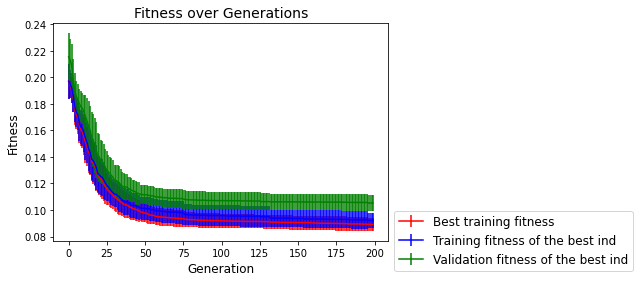

In [ ]:
# Plot statistics:
x = np.arange(0, MAX_GENERATIONS)

plt.xlabel('Generation', fontsize=12)
plt.ylabel('Fitness', fontsize=12)
plt.title('Fitness over Generations', fontsize=14)
plt.errorbar(x, np.mean(minListFitness2, axis=0), yerr=np.std(minListFitness2, axis=0),label="Best training fitness",color="Red")
plt.errorbar(x, np.mean(trainingFitness2, axis=0), yerr=np.std(trainingFitness2, axis=0),label="Training fitness of the best ind",color="Blue")
plt.errorbar(x, np.mean(valFitness2, axis=0), yerr=np.std(valFitness2, axis=0),label="Validation fitness of the best ind", color="Green")
plt.legend(fontsize=12, loc='center left', bbox_to_anchor=(1, 0))
plt.show()

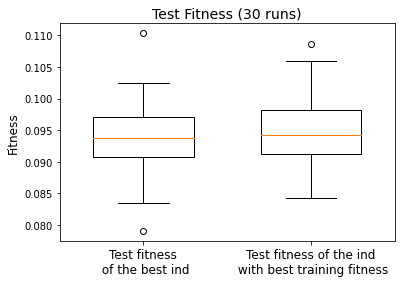

In [ ]:
data = [testFitness2, testFitness_min2]
plt.ylabel('Fitness', fontsize=12)
plt.title('Test Fitness (30 runs)', fontsize=14)
plt.boxplot(data, widths = 0.6)
plt.axes().set_xticklabels(['Test fitness\n of the best ind', 'Test fitness of the ind\n with best training fitness'], fontsize=12)

plt.show()

In [ ]:
a = 0
for i in range(N_RUNS):
  if testFitness2[i] <= testFitness_min2[i]:
    a += 1
print("Number of times in which using the approach with validation set is better or equal: ", a, " of ", N_RUNS)

Number of times in which using the approach with validation set is better or equal:  22  of  30
